<a href="https://colab.research.google.com/github/dphi-official/Datathons/blob/master/Top_Notebook_Submissions/Data_Sprint/Data_Sprint_7/Rank_8_Nilanjan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nilanjan Kumar

### LinkedIn profile - https://www.linkedin.com/in/nilanjan-kumar-05057b136/

### https://dphi.tech/practice/challenge/36

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#importing ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
bank_marketing_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_marketing_data/training_set_label.csv" )

In [ ]:
bank_marketing_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
bank_marketing_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribe'],
      dtype='object')

In [ ]:
bank_marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
subscribe    45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [ ]:
bank_marketing_data.subscribe.value_counts()

0    39922
1     5289
Name: subscribe, dtype: int64

In [ ]:
bank_marketing_data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
bank_marketing_data.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
bank_marketing_data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
bank_client = bank_marketing_data.iloc[:,0:8]
bank_client.head()

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no


In [ ]:
print('Default:\n',bank_client['default'].unique())
print('Housing:\n',bank_client['housing'].unique())
print('Loan:\n',bank_client['loan'].unique())

Default:
 ['no' 'yes']
Housing:
 ['yes' 'no']
Loan:
 ['no' 'yes']


In [ ]:
print('Min age: ', bank_client['age'].min())
print('Max age: ', bank_client['age'].max())
print('Null Values: ', bank_client['age'].isnull().any())

Min age:  18
Max age:  95
Null Values:  False


## Finding Outliers

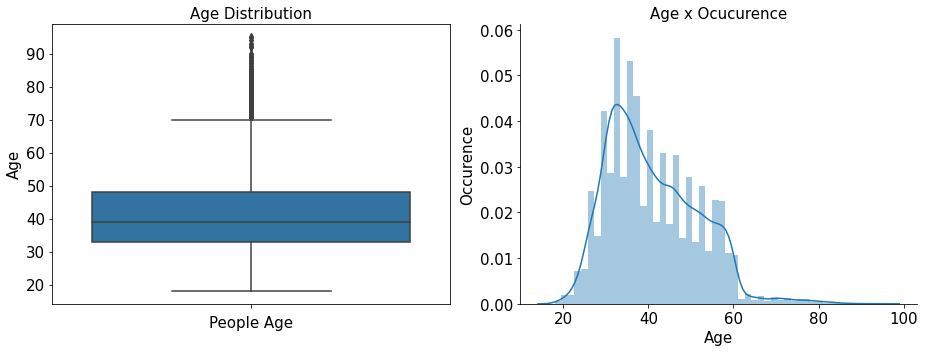

In [ ]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 


In [ ]:
# Quartiles
print('1º Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0
Ages above:  70.5 are outliers


In [ ]:
print('Numerber of outliers: ', bank_client[bank_client['age'] > 70.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 70.6]['age'].count()*100/len(bank_client),2), '%')

Numerber of outliers:  487
Number of clients:  45211
Outliers are: 1.08 %


In [ ]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(bank_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_client['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.9
STD : 10.6
CV  : 25.9 , High middle dispersion


## Treating Categorical variables

In [ ]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [ ]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 33, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 33) & (dataframe['age'] <= 39), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 39) & (dataframe['age'] <= 48), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 48) & (dataframe['age'] <= 71), 'age'] = 4
    dataframe.loc[dataframe['age'] > 71, 'age'] = 5
           
    return dataframe

age(bank_client);

In [ ]:
bank_client.head()

,age,job,marital,education,default,balance,housing,loan
0,1,4,1,2,0,1,1,0
1,1,9,2,1,0,1,1,0
2,1,2,1,1,0,1,1,1
3,1,1,1,3,0,1,1,0
4,1,11,2,3,0,1,0,0


In [ ]:
# Quartiles
print('1º Quartile: ', bank_client['balance'].quantile(q = 0.25))
print('2º Quartile: ', bank_client['balance'].quantile(q = 0.50))
print('3º Quartile: ', bank_client['balance'].quantile(q = 0.75))
print('4º Quartile: ', bank_client['balance'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Balance above: ', bank_client['balance'].quantile(q = 0.75) + 
                      1.5*(bank_client['balance'].quantile(q = 0.75) - bank_client['balance'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  1.0
2º Quartile:  1.0
3º Quartile:  1.0
4º Quartile:  1.0
Balance above:  1.0 are outliers


In [ ]:
print('Numerber of outliers: ', bank_client[bank_client['balance'] > 3462]['balance'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['balance'] > 3462]['balance'].count()*100/len(bank_client),2), '%')

Numerber of outliers:  0
Number of clients:  45211
Outliers are: 0.0 %


In [ ]:
def balance(dataframe):
    dataframe.loc[dataframe['balance'] <= 72, 'balance'] = 1
    dataframe.loc[(dataframe['balance'] > 72) & (dataframe['balance'] <= 448), 'balance'] = 2
    dataframe.loc[(dataframe['balance'] > 448) & (dataframe['balance'] <= 1428), 'balance'] = 3
    dataframe.loc[(dataframe['balance'] > 1428) & (dataframe['balance'] <= 3462), 'balance'] = 4
    dataframe.loc[dataframe['balance'] > 3462, 'balance'] = 5
           
    return dataframe

balance(bank_client);

In [ ]:
bank_client.head()

,age,job,marital,education,default,balance,housing,loan
0,1,4,1,2,0,1,1,0
1,1,9,2,1,0,1,1,0
2,1,2,1,1,0,1,1,1
3,1,1,1,3,0,1,1,0
4,1,11,2,3,0,1,0,0


## Related with the last contact of the current campaign

In [ ]:
bank_related = bank_marketing_data.iloc[: , 8:12]
bank_related.head()

,contact,day,month,duration
0,unknown,5,may,261
1,unknown,5,may,151
2,unknown,5,may,76
3,unknown,5,may,92
4,unknown,5,may,198


In [ ]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day'].unique())

Kind of Contact: 
 ['unknown' 'cellular' 'telephone']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]


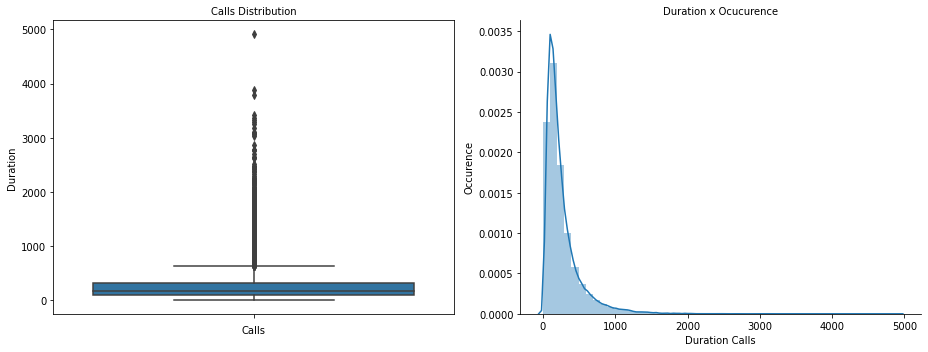

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [ ]:
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [ ]:
print('1º Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  103.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  643.0 are outliers


In [ ]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 643]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 643]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  3235
Number of clients:  45211
Outliers are: 7.16 %


In [ ]:
bank_marketing_data[(bank_marketing_data['duration'] == 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,0
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,0
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,0


## Contact, Month, Day of Week

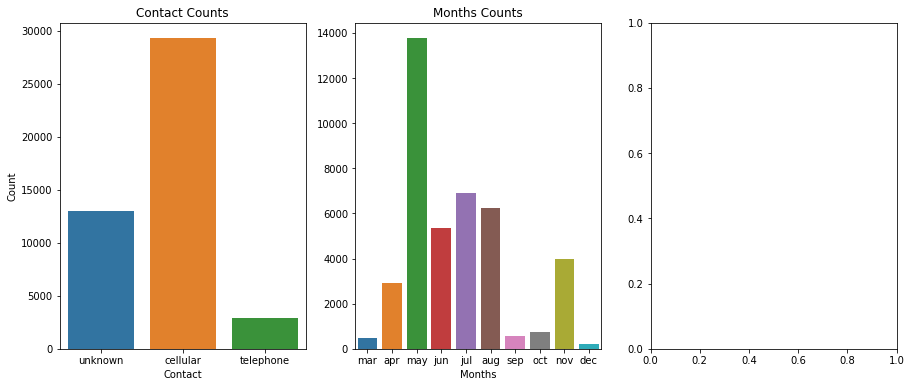

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)


In [ ]:
bank_related[bank_related['duration'] > 643].count()

contact     3235
day         3235
month       3235
duration    3235
dtype: int64

In [ ]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 

In [ ]:
bank_related.head()

,contact,day,month,duration
0,2,5,8,261
1,2,5,8,151
2,2,5,8,76
3,2,5,8,92
4,2,5,8,198


In [ ]:
def duration(data):

    data.loc[data['duration'] <= 103, 'duration'] = 1
    data.loc[(data['duration'] > 103) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 643), 'duration'] = 4
    data.loc[data['duration']  > 643, 'duration'] = 5

    return data
duration(bank_related);

In [ ]:
bank_o = bank_marketing_data.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,-1,0,unknown
1,1,-1,0,unknown
2,1,-1,0,unknown
3,1,-1,0,unknown
4,1,-1,0,unknown


In [ ]:
bank_o['poutcome'] = labelencoder_X.fit_transform(bank_o['poutcome'])

In [ ]:
bank_final= pd.concat([bank_client, bank_related, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default','balance', 'housing', 'loan',
                     'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(45211, 16)

In [ ]:
bank_final.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,4,1,2,0,1,1,0,2,5,8,3,1,-1,0,3
1,1,9,2,1,0,1,1,0,2,5,8,2,1,-1,0,3
2,1,2,1,1,0,1,1,1,2,5,8,1,1,-1,0,3
3,1,1,1,3,0,1,1,0,2,5,8,1,1,-1,0,3
4,1,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,3


In [ ]:
y = bank_marketing_data.subscribe

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.33, random_state = 42)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
41031,1,3,2,2,0,1,0,0,0,13,1,2,2,-1,0,3
41950,1,7,1,1,0,1,0,0,0,22,10,1,1,106,1,0
39883,1,7,0,1,0,1,0,0,0,2,6,2,1,96,3,0
44938,1,3,2,2,0,1,0,0,1,6,10,4,1,204,3,0
42103,1,9,1,2,0,1,0,0,0,2,9,2,3,-1,0,3


In [ ]:
X_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[12919   256]
 [ 1395   350]]
89.0


k=1 87.02 (+/- 0.38)
k=2 88.83 (+/- 0.50)
k=3 88.78 (+/- 0.42)
k=4 89.12 (+/- 0.49)
k=5 89.05 (+/- 0.53)
k=6 89.03 (+/- 0.39)
k=7 89.20 (+/- 0.47)
k=8 89.16 (+/- 0.40)
k=9 89.24 (+/- 0.48)
k=10 89.13 (+/- 0.38)
k=11 89.25 (+/- 0.40)
k=12 89.18 (+/- 0.42)
k=13 89.26 (+/- 0.46)
k=14 89.19 (+/- 0.47)
k=15 89.23 (+/- 0.49)
k=16 89.13 (+/- 0.42)
k=17 89.19 (+/- 0.48)
k=18 89.16 (+/- 0.47)
k=19 89.20 (+/- 0.48)
k=20 89.12 (+/- 0.45)
k=21 89.15 (+/- 0.40)
k=22 89.07 (+/- 0.42)
k=23 89.16 (+/- 0.42)
k=24 89.11 (+/- 0.40)
k=25 89.10 (+/- 0.41)
The optimal number of neighbors is 12 with 89.3%


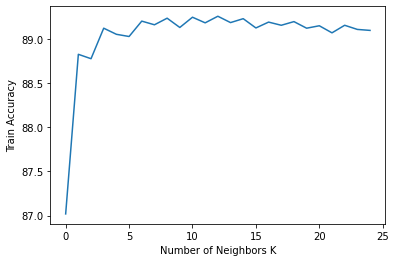

In [ ]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[12976   199]
 [ 1353   392]]
90.0


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)

[[12683   492]
 [  974   771]]
90.0


In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 200))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=200))

In [ ]:
select_X_train = sel.transform(X_train)
select_X_test = sel.transform(X_test) 

# train model
#selection_model = XGBClassifier()
selection_model1 = RandomForestClassifier(n_estimators = 200)
selection_model1.fit(select_X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc_prd1 = selection_model1.predict(select_X_test)

In [ ]:
print(confusion_matrix(y_test, rfc_prd1 ))
print(round(accuracy_score(y_test, rfc_prd1),2)*100)

[[7408  313]
 [ 606  455]]
90.0


In [ ]:
from sklearn.model_selection import GridSearchCV

# Different parameters in random forest

criterion = ['gini', 'entropy']        # what criteria to consider

n_estimators = [100, 200, 300]       # Number of trees in random forest

max_features = ['auto', 'sqrt']       # Number of features to consider at every split

max_depth = [10, 20]      # Maximum number of levels in tree. Hope you remember linspace function from numpy session

max_depth.append(None)     # also appendin 'None' in max_depth i.e. no maximum depth to be considered.

params = {'criterion': criterion,
          'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth}

In [ ]:
gs = GridSearchCV(rfc, param_grid=params, n_jobs=-1)

In [ ]:
#gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=200), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [ ]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [ ]:
gs.best_score_

0.9029893604775265

In [ ]:
gs.score(X_test, y_test)

0.901389205192439

In [ ]:
rfc_new = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, max_features='auto')
rfc_new.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
rfc_new_pred = rfc_new.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, rfc_new_pred ))
print(round(accuracy_score(y_test, rfc_new_pred),2)*100)

[[7573  148]
 [ 702  359]]
90.0


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)

[[7455  266]
 [ 556  505]]
91.0


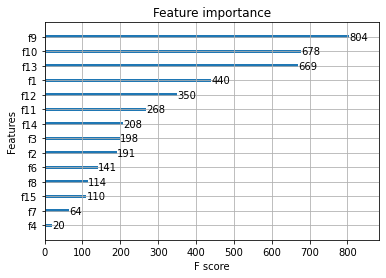

In [ ]:
from xgboost import plot_importance

plot_importance(xgb)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
selection = SelectFromModel(xgb, threshold=0.01)
selection.fit(X_train, y_train)

# Transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test) 

# train model
#selection_model = XGBClassifier()
selection_model = XGBClassifier(max_depth=3, learning_rate=0.30505)
selection_model.fit(select_X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.30505, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgb_prd = selection_model.predict(select_X_test)

In [ ]:
print(confusion_matrix(y_test, xgb_prd ))
print(round(accuracy_score(y_test, xgb_prd),2)*100)

[[7505  216]
 [ 614  447]]
91.0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)

[[7537  184]
 [ 659  402]]
90.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree regressor object
clf = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifer
dec = clf.fit(X_train, y_train)

#Predict the response for test dataset
d_pred = clf.predict(X_test)

print(confusion_matrix(y_test, d_pred ))
print(round(accuracy_score(y_test, d_pred),2)*100)

[[7198  523]
 [ 541  520]]
88.0


In [ ]:
from sklearn.metrics import classification_report
print(' Reports\n',classification_report(y_test, xgbprd))

 Reports
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7721
           1       0.65      0.48      0.55      1061

    accuracy                           0.91      8782
   macro avg       0.79      0.72      0.75      8782
weighted avg       0.90      0.91      0.90      8782



## Working on Test data

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_marketing_data/testing_set_label.csv')

In [ ]:
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure
1,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other
2,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown
3,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown
4,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure


In [ ]:
test_data.shape

(4509, 16)

In [ ]:
test_client = test_data.iloc[:,0:8]
test_client.head()

,age,job,marital,education,default,balance,housing,loan
0,35,management,single,tertiary,no,747,no,no
1,36,self-employed,married,tertiary,no,307,yes,no
2,39,technician,married,secondary,no,147,yes,no
3,41,entrepreneur,married,tertiary,no,221,yes,no
4,43,services,married,primary,no,-88,yes,yes


In [ ]:
print('Default:\n',test_client['default'].unique())
print('Housing:\n',test_client['housing'].unique())
print('Loan:\n',test_client['loan'].unique())

Default:
 ['no' 'yes']
Housing:
 ['no' 'yes']
Loan:
 ['no' 'yes']


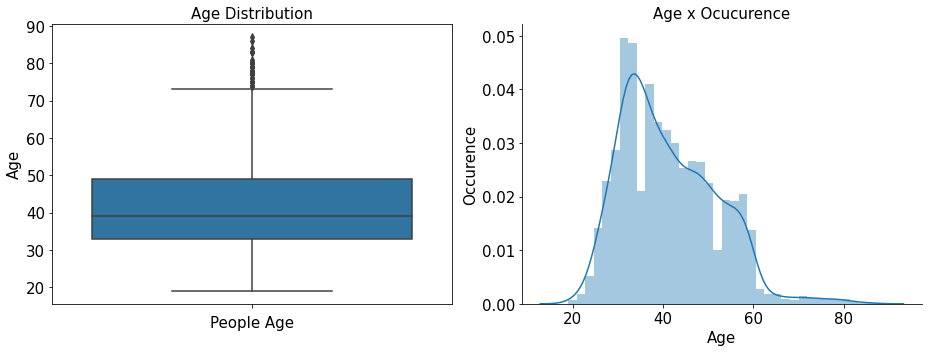

In [ ]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = test_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(test_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [ ]:
# Quartiles
print('1º Quartile: ', test_client['age'].quantile(q = 0.25))
print('2º Quartile: ', test_client['age'].quantile(q = 0.50))
print('3º Quartile: ', test_client['age'].quantile(q = 0.75))
print('4º Quartile: ', test_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', test_client['age'].quantile(q = 0.75) + 
                      1.5*(test_client['age'].quantile(q = 0.75) - test_client['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  49.0
4º Quartile:  87.0
Ages above:  73.0 are outliers


In [ ]:
print('Numerber of outliers: ', test_client[test_client['age'] > 73.0]['age'].count())
print('Number of clients: ', len(test_client))
#Outliers in %
print('Outliers are:', round(test_client[test_client['age'] > 73.0]['age'].count()*100/len(test_client),2), '%')

Numerber of outliers:  38
Number of clients:  4509
Outliers are: 0.84 %


In [ ]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(test_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(test_client['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(test_client['age'].std()*100/test_client['age'].mean(), 1), ', High middle dispersion')

MEAN: 41.2
STD : 10.6
CV  : 25.7 , High middle dispersion


In [ ]:
test_client['job']      = labelencoder_X.fit_transform(test_client['job']) 
test_client['marital']  = labelencoder_X.fit_transform(test_client['marital']) 
test_client['education']= labelencoder_X.fit_transform(test_client['education']) 
test_client['default']  = labelencoder_X.fit_transform(test_client['default']) 
test_client['housing']  = labelencoder_X.fit_transform(test_client['housing']) 
test_client['loan']     = labelencoder_X.fit_transform(test_client['loan']) 

In [ ]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 33, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 33) & (dataframe['age'] <= 39), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 39) & (dataframe['age'] <= 49), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 49) & (dataframe['age'] <= 73), 'age'] = 4
    dataframe.loc[dataframe['age'] > 73, 'age'] = 5
           
    return dataframe

age(test_client);

In [ ]:
# Quartiles
print('1º Quartile: ', test_client['balance'].quantile(q = 0.25))
print('2º Quartile: ', test_client['balance'].quantile(q = 0.50))
print('3º Quartile: ', test_client['balance'].quantile(q = 0.75))
print('4º Quartile: ', test_client['balance'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Balance above: ', test_client['balance'].quantile(q = 0.75) + 
                      1.5*(test_client['balance'].quantile(q = 0.75) - test_client['balance'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  69.0
2º Quartile:  443.0
3º Quartile:  1480.0
4º Quartile:  71188.0
Balance above:  3596.5 are outliers


In [ ]:
def balance(dataframe):
    dataframe.loc[dataframe['balance'] <= 69, 'balance'] = 1
    dataframe.loc[(dataframe['balance'] > 69) & (dataframe['balance'] <= 443), 'balance'] = 2
    dataframe.loc[(dataframe['balance'] > 443) & (dataframe['balance'] <= 1480), 'balance'] = 3
    dataframe.loc[(dataframe['balance'] > 1480) & (dataframe['balance'] <= 3597), 'balance'] = 4
    dataframe.loc[dataframe['balance'] > 3597, 'balance'] = 5
           
    return dataframe

balance(test_client);

In [ ]:
test_client.head()

,age,job,marital,education,default,balance,housing,loan
0,2,4,2,2,0,3,0,0
1,2,6,1,2,0,2,1,0
2,2,9,1,1,0,2,1,0
3,3,2,1,2,0,2,1,0
4,3,7,1,0,0,1,1,1


In [ ]:
test_related = test_data.iloc[: , 8:12]
test_related.head()

,contact,day,month,duration
0,cellular,23,feb,141
1,cellular,14,may,341
2,cellular,6,may,151
3,unknown,14,may,57
4,cellular,17,apr,313


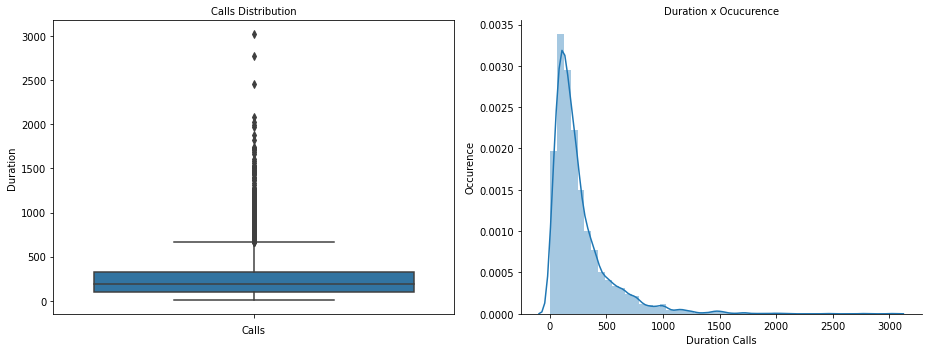

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = test_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(test_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [ ]:
print("Max duration  call in minutes:  ", round((test_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((test_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((test_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((test_related['duration'].std()/60),1))

Max duration  call in minutes:   50.4
Min duration  call in minutes:    0.1
Mean duration call in minutes:    4.4
STD duration  call in minutes:    4.3


In [ ]:
print('1º Quartile: ', test_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', test_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', test_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', test_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', test_related['duration'].quantile(q = 0.75) + 
                      1.5*(test_related['duration'].quantile(q = 0.75) - test_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  104.0
2º Quartile:  185.0
3º Quartile:  330.0
4º Quartile:  3025.0
Duration calls above:  669.0 are outliers


In [ ]:
print('Numerber of outliers: ', test_related[test_related['duration'] > 666.5]['duration'].count())
print('Number of clients: ', len(test_related))
#Outliers in %
print('Outliers are:', round(test_related[test_related['duration'] > 666.5]['duration'].count()*100/len(test_related),2), '%')

Numerber of outliers:  330
Number of clients:  4509
Outliers are: 7.32 %


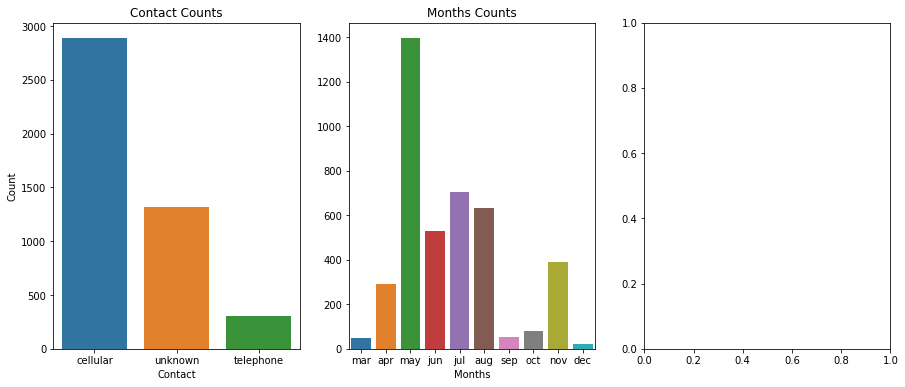

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(test_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(test_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)


In [ ]:
test_related['contact']     = labelencoder_X.fit_transform(test_related['contact']) 
test_related['month']       = labelencoder_X.fit_transform(test_related['month'])

In [ ]:
def duration(data):

    data.loc[data['duration'] <= 104, 'duration'] = 1
    data.loc[(data['duration'] > 104) & (data['duration'] <= 185)  , 'duration']    = 2
    data.loc[(data['duration'] > 185) & (data['duration'] <= 330)  , 'duration']   = 3
    data.loc[(data['duration'] > 330) & (data['duration'] <= 669), 'duration'] = 4
    data.loc[data['duration']  > 669, 'duration'] = 5

    return data
duration(test_related);

In [ ]:
test_o = test_data.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
test_o.head()

,campaign,pdays,previous,poutcome
0,2,176,3,failure
1,1,330,2,other
2,2,-1,0,unknown
3,2,-1,0,unknown
4,1,147,2,failure


In [ ]:
test_o['poutcome'] = labelencoder_X.fit_transform(test_o['poutcome'])

In [ ]:
test_final= pd.concat([test_client, test_related, test_o], axis = 1)
test_final = test_final[['age', 'job', 'marital', 'education', 'default','balance', 'housing', 'loan',
                     'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]
test_final.shape

(4509, 16)

In [ ]:
test_final.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,2,4,2,2,0,3,0,0,0,23,3,2,2,176,3,0
1,2,6,1,2,0,2,1,0,0,14,8,4,1,330,2,1
2,2,9,1,1,0,2,1,0,0,6,8,2,2,-1,0,3
3,3,2,1,2,0,2,1,0,2,14,8,1,2,-1,0,3
4,3,7,1,0,0,1,1,1,0,17,0,3,1,147,2,0


In [ ]:
test_final = sc_X.fit_transform(test_final)

In [ ]:
yprd = xgb.predict(test_final)

In [ ]:
res = pd.DataFrame(yprd) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("submission_xgb.csv")

In [ ]:
yprd1 = rfc.predict(test_final)

In [ ]:
res = pd.DataFrame(yprd1) #target is nothing but the final predictions of your model on input features of your new unseen test data
 
res.columns = ["prediction"]
res.to_csv("submission_rfc.csv")

In [ ]:
yprd2 = rfc_new.predict(test_final)

In [ ]:
res = pd.DataFrame(yprd1) #target is nothing but the final predictions of your model on input features of your new unseen test data
 
res.columns = ["prediction"]
res.to_csv("submission_rfc1.csv")

In [ ]:
yprd2 = gbk.predict(test_final)

In [ ]:
res = pd.DataFrame(yprd2) #target is nothing but the final predictions of your model on input features of your new unseen test data
 
res.columns = ["prediction"]
res.to_csv("submission_gbk.csv")

In [ ]:
yprd3 = clf.predict(test_final)

In [ ]:
res = pd.DataFrame(yprd3) #target is nothing but the final predictions of your model on input features of your new unseen test data
 
res.columns = ["prediction"]
res.to_csv("submission_clf.csv")

In [ ]:
select_test = selection.transform(test_final)

In [ ]:
yprd4 = selection_model.predict(select_test)

In [ ]:
res = pd.DataFrame(yprd4) #target is nothing but the final predictions of your model on input features of your new unseen test data
 
res.columns = ["prediction"]
res.to_csv("submission_1.csv")

In [ ]:
select_test1 = sel.transform(test_final)

In [ ]:
yprd5 = selection_model1.predict(select_test1)

In [ ]:
res = pd.DataFrame(yprd5) #target is nothing but the final predictions of your model on input features of your new unseen test data
 
res.columns = ["prediction"]
res.to_csv("submission_2.csv")

In [ ]:
yprd6 = knn.predict(test_final)

In [ ]:
res = pd.DataFrame(yprd6) #target is nothing but the final predictions of your model on input features of your new unseen test data
 
res.columns = ["prediction"]
res.to_csv("submission_knn.csv")